# Scenario A - Noise Level Variation

This file is used to evaluate the inference (numerical) results.

The model used in the inference of the parameters is formulated as follows: 

\begin{equation}
\large y = f(x) = \sum\limits_{m=1}^M \big[A_m \cdot e^{-\frac{(x-\mu_m)^2}{2\cdot\sigma_m^2}}\big] + \epsilon
\end{equation}

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pymc3 as pm
import arviz as az

#az.style.use('arviz-darkgrid')

print('Running on PyMC3 v{}'.format(pm.__version__))

WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


Running on PyMC3 v3.8


## Barplot definitions

In [2]:
def barplot_noise(init_mean, init_std, figure_size=(12,8), fname='barplot_noise'):
    
    plt.figure(figsize=figure_size)

    # fontsize, labels and title
    fsize = 14
    plt.ylabel('Convergence score', fontweight='bold', fontsize=fsize)
    plt.title('Convergence by init method and noise level (n=8, obs=10)', fontweight='bold', fontsize=fsize)

    # y-limit, barwidth and errorbar size
    plt.ylim(0, 11)
    barWidth = 0.25
    caps = 7
    plt.tick_params(axis="x", labelsize=14)
    plt.tick_params(axis="y", labelsize=14)

    # height of bars
    bars1, err1 = ([init_mean[0][0], init_mean[1][0], init_mean[2][0]], 
                   [init_std[0][0], init_std[1][0], init_std[2][0]])
    bars2, err2 = ([init_mean[0][1], init_mean[1][1], init_mean[2][1]], 
                   [init_std[0][1], init_std[1][1], init_std[2][1]])
    bars5, err5 = ([init_mean[0][2], init_mean[1][2], init_mean[2][2]], 
                   [init_std[0][2], init_std[1][2], init_std[2][2]])

    # set position of bar on X axis
    r1 = np.arange(len(bars1))
    r2 = [x + barWidth for x in r1]
    r5 = [x + barWidth for x in r2]

    plt.bar(r1, bars1, yerr=err1, capsize=caps, color='burlywood', width=barWidth, 
            edgecolor='white', label='1% noise')
    plt.bar(r2, bars2, yerr=err2, capsize=caps, color='peru', width=barWidth, 
            edgecolor='white', label='2% noise')
    plt.bar(r5, bars5, yerr=err5, capsize=caps, color='saddlebrown', width=barWidth, 
            edgecolor='white', label='5% noise')

    # add xticks on the middle of the group bars
    plt.xlabel('Init Method', fontweight='bold', fontsize=fsize)
    plt.xticks([r + barWidth for r in range(len(bars1))], ['jitter+adapt_diag', 'advi+adapt_diag', 'adapt_diag'])
    plt.legend(loc='best',fontsize=fsize)
    
    # save figure
    plt.savefig(fname + '.png', dpi=150)

In [3]:
def barplot_init(init_mean_sum, init_std_sum, figure_size=(12,8), fname='barplot_init'):
    
    plt.figure(figsize=figure_size)

    # fontsize, labels and title
    fsize = 14
    plt.ylabel('Convergence score', fontweight='bold', fontsize=fsize)
    plt.title('Convergence by init method (n=8, obs=30)', fontweight='bold', fontsize=fsize)

    # y-limit, barwidth and errorbar size
    plt.ylim(0, 33)
    barWidth = 0.25
    caps = 7
    plt.tick_params(axis="x", labelsize=14)
    plt.tick_params(axis="y", labelsize=14)
    
    # height of bar
    bars, errs = ([init_mean_sum[0], init_mean_sum[1], init_mean_sum[2]], 
                  [init_std_sum[0], init_std_sum[1], init_std_sum[2]])

    # position of bar on X axis
    y_pos = np.arange(len(bars))
    
    colors = ['burlywood','peru','saddlebrown']
    plt.bar(y_pos, bars, yerr=errs, capsize=caps, color=colors, edgecolor='white')
    for i in range(len(bars)):
        plt.text(i+.1, y=bars[i]+.5, s="{0:.2f}".format(bars[i]), size=fsize)

    # add xticks on the middle of the group bars
    plt.xlabel('Init Method', fontweight='bold', fontsize=fsize)
    plt.xticks(y_pos, ['jitter+adapt_diag', 'advi+adapt_diag', 'adapt_diag'])
    
    # save figure
    plt.savefig(fname + '.png', dpi=150)

## Scenario A results: Normal model (peak and no peak information)

In [4]:
# results for scenario A: 

# 30 generated spectra (15 samples each) with different noise levels.
# array is filled with number of convergences (rhat < 1.1 & r2 > .99)

# run 8x (8x30=240 spectra total) with peak info passed to model (model NORMAL)
adapt_raw = np.array([[6,6,6,5,5,5,5,6],
                      [6,5,6,4,6,5,4,5],
                      [3,4,4,3,3,4,5,4]])

advi_raw = np.array([[6,7,6,6,6,7,7,6],
                     [4,5,4,2,3,4,4,3],
                     [4,4,4,4,5,4,4,4]])

auto_raw = np.array([[5,3,3,3,2,2,7,3],
                     [3,6,5,3,3,4,5,4],
                     [3,4,4,3,2,4,4,4]])

# run 8x (8x30=240 spectra total) with NO peak info passed to model (model NORMAL)
adapt_raw_np = np.array([[2,3,0,1,1,3,1,2],
                         [0,0,0,0,0,0,0,0],
                         [1,2,3,0,0,0,1,0]])

advi_raw_np = np.array([[0,2,1,0,2,2,2,1],
                        [1,2,1,2,2,2,2,2],
                        [1,0,0,1,1,1,0,1]])

auto_raw_np = np.array([[1,2,1,1,1,3,0,0],
                        [0,2,1,1,0,1,1,0],
                        [1,1,0,0,0,0,0,1]])

# init method means
init_mean = [auto_raw.mean(axis=1),advi_raw.mean(axis=1),adapt_raw.mean(axis=1)]
init_mean_np = [auto_raw_np.mean(axis=1),advi_raw_np.mean(axis=1),adapt_raw_np.mean(axis=1)]

# init method standard deviations
init_std = [auto_raw.std(axis=1),advi_raw.std(axis=1),adapt_raw.std(axis=1)]
init_std_np = [auto_raw_np.std(axis=1),advi_raw_np.std(axis=1),adapt_raw_np.std(axis=1)]

# init method means sum
init_mean_sum = [auto_raw.sum(axis=0).mean(),advi_raw.sum(axis=0).mean(),adapt_raw.sum(axis=0).mean()]
init_mean_sum_np = [auto_raw_np.sum(axis=0).mean(),advi_raw_np.sum(axis=0).mean(),adapt_raw_np.sum(axis=0).mean()]

# init method standard deviations sum
init_std_sum = [auto_raw.sum(axis=0).std(),advi_raw.sum(axis=0).std(),adapt_raw.sum(axis=0).std()]
init_std_sum_np = [auto_raw_np.sum(axis=0).std(),advi_raw_np.sum(axis=0).std(),adapt_raw_np.sum(axis=0).std()]

## Covergence by init method and noise level

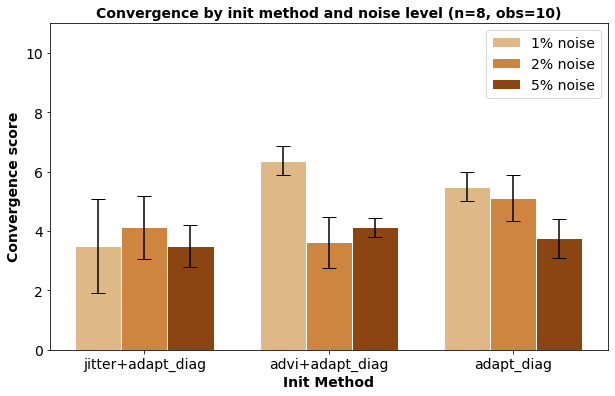

In [5]:
# normal model with peak information
barplot_noise(init_mean, init_std, figure_size=(10,6), fname='sena_norm_peak_noise')

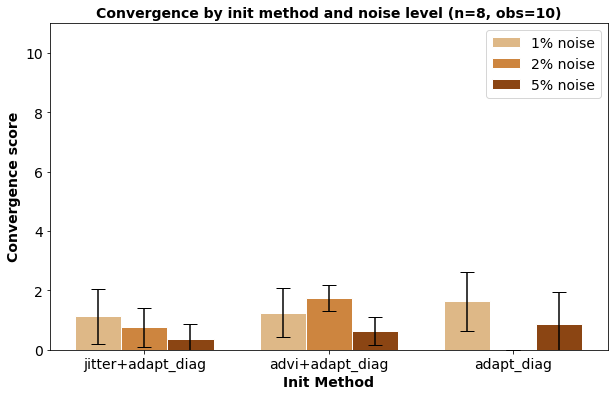

In [6]:
# normal model with NO peak information
barplot_noise(init_mean_np, init_std_np, figure_size=(10,6), fname='sena_norm_nopeak_noise')

## Covergence by init method

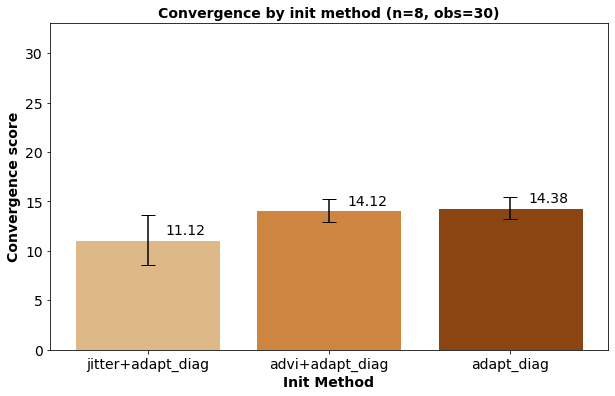

In [7]:
# normal model with peak information
barplot_init(init_mean_sum, init_std_sum, figure_size=(10,6), fname='sena_norm_peak_init')

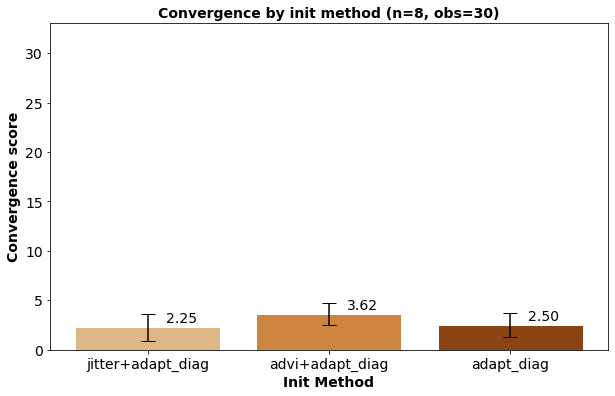

In [8]:
# normal model with NO peak information
barplot_init(init_mean_sum_np, init_std_sum_np, figure_size=(10,6), fname='sena_norm_nopeak_init')

## Scenario A results: LogNormal model (peak and no peak information)

In [9]:
# results for scenario A: 

# 30 generated spectra (15 samples each) with different noise levels.
# array is filled with number of convergences (rhat < 1.1 & r2 > .99)

# run 8x (8x30=240 spectra total) with peak info passed to model (model LOGNORMAL)
adapt_raw = np.array([[9,9,9,9,9,10,10,10],
                      [10,10,10,10,10,10,10,10],
                      [9,9,9,9,9,9,9,9]])

advi_raw = np.array([[8,9,10,9,9,9,9,8],
                     [9,9,10,9,10,9,10,10],
                     [9,8,9,8,8,9,9,8]])

auto_raw = np.array([[4,2,4,5,4,2,1,3],
                     [5,4,2,6,4,4,5,3],
                     [1,5,1,2,2,3,4,4]])

# run 8x (8x30=240 spectra total) with NO peak info passed to model (model LOGNORMAL)
adapt_raw_np = np.array([[0,1,0,0,0,1,0,2],
                         [2,2,0,3,2,1,0,1],
                         [2,0,0,1,1,0,1,0]])

advi_raw_np = np.array([[1,0,2,2,1,1,1,1],
                        [1,1,2,1,1,2,3,0],
                        [2,0,0,3,2,1,0,2]])

auto_raw_np = np.array([[1,0,0,2,0,0,0,0],
                        [2,0,0,2,0,1,2,0],
                        [0,0,0,0,0,0,1,1]])

# init method means
init_mean = [auto_raw.mean(axis=1),advi_raw.mean(axis=1),adapt_raw.mean(axis=1)]
init_mean_np = [auto_raw_np.mean(axis=1),advi_raw_np.mean(axis=1),adapt_raw_np.mean(axis=1)]

# init method standard deviations
init_std = [auto_raw.std(axis=1),advi_raw.std(axis=1),adapt_raw.std(axis=1)]
init_std_np = [auto_raw_np.std(axis=1),advi_raw_np.std(axis=1),adapt_raw_np.std(axis=1)]

# init method means sum
init_mean_sum = [auto_raw.sum(axis=0).mean(),advi_raw.sum(axis=0).mean(),adapt_raw.sum(axis=0).mean()]
init_mean_sum_np = [auto_raw_np.sum(axis=0).mean(),advi_raw_np.sum(axis=0).mean(),adapt_raw_np.sum(axis=0).mean()]

# init method standard deviations sum
init_std_sum = [auto_raw.sum(axis=0).std(),advi_raw.sum(axis=0).std(),adapt_raw.sum(axis=0).std()]
init_std_sum_np = [auto_raw_np.sum(axis=0).std(),advi_raw_np.sum(axis=0).std(),adapt_raw_np.sum(axis=0).std()]

## Covergence by init method and noise level

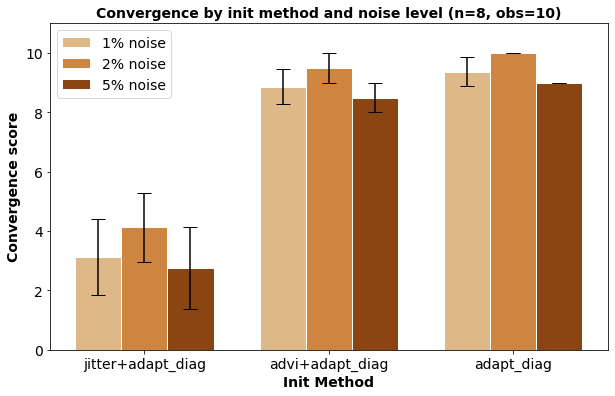

In [10]:
# lognormal model with peak information
barplot_noise(init_mean, init_std, figure_size=(10,6), fname='sena_lognorm_peak_noise')

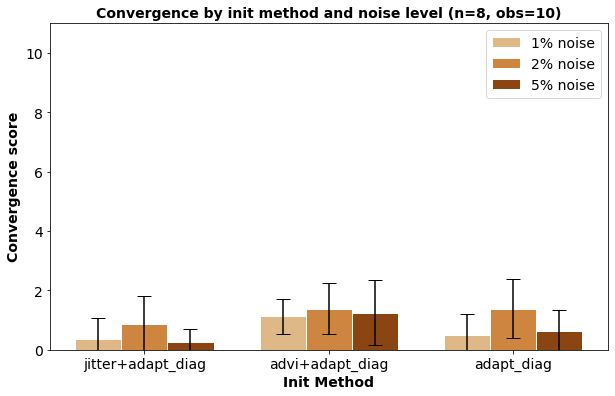

In [11]:
# lognormal model with NO peak information
barplot_noise(init_mean_np, init_std_np, figure_size=(10,6), fname='sena_lognorm_nopeak_noise')

## Covergence by init method

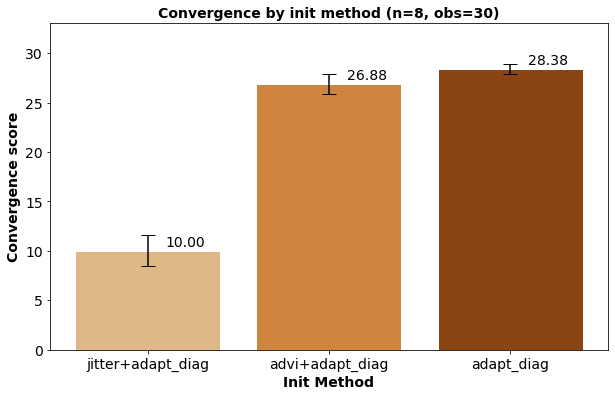

In [12]:
# lognormal model with peak information
barplot_init(init_mean_sum, init_std_sum, figure_size=(10,6), fname='sena_lognorm_peak_init')

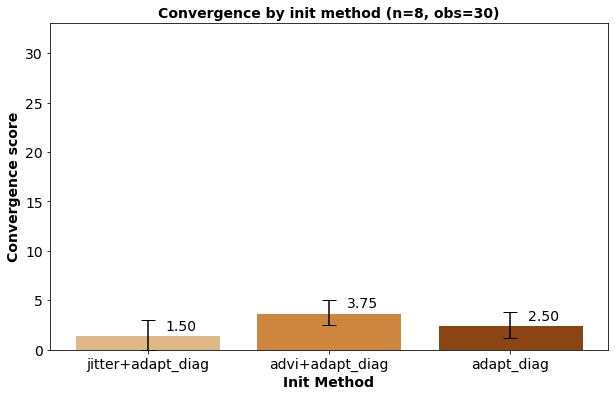

In [13]:
# lognormal model with NO peak information
barplot_init(init_mean_sum_np, init_std_sum_np, figure_size=(10,6), fname='sena_lognorm_nopeak_init')